> `Testing`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
# from skimage.color import grey2rgb

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [3]:
test_dataset = valid_datagen.flow_from_directory(directory = r'C:\Users\LAPTOP HOUSE\Desktop\Alzheimers_Classification\dataoriginal\test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 254 images belonging to 4 classes.


In [4]:
model = tensorflow.keras.models.load_model('best_weights.hdf5')

In [5]:
model.evaluate(test_dataset)

2/2 [==============================] - 8s 445ms/step - loss: 0.5151 - auc: 0.9538


[0.5151168704032898, 0.953835666179657]

1/1 [==============================] - 2s 2s/step
[[6.2929383e-03 9.9313498e-01 1.1193004e-04 4.6009236e-04]]
[1]
1/1 [==============================] - 0s 31ms/step
99.31 % chances are there that the image is ModerateDemented
<class 'str'>


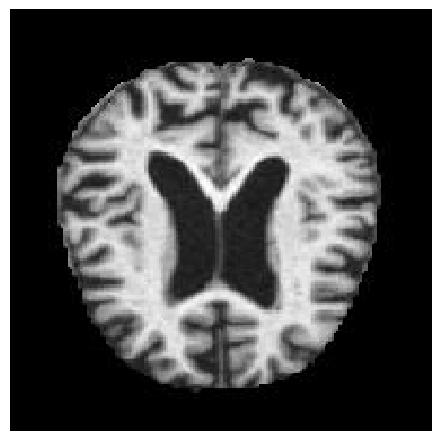

In [6]:
# Test Case 1: Moderate Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:\Users\LAPTOP HOUSE\Desktop\Alzheimers_Classification\test images\image1.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')

img = np.expand_dims(img,axis=0)
predict_x=model.predict(img) 
print(predict_x)
answer=np.argmax(predict_x,axis=1)
print(answer)

probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])
print(type(idc[answer[0]]))

In [7]:
print(idc)

{0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}


1/1 [==============================] - 0s 33ms/step
[[1.3135750e-04 2.7646445e-08 3.5516556e-02 9.6435201e-01]]
[3]
1/1 [==============================] - 0s 39ms/step
96.44 % chances are there that the image is VeryMildDemented


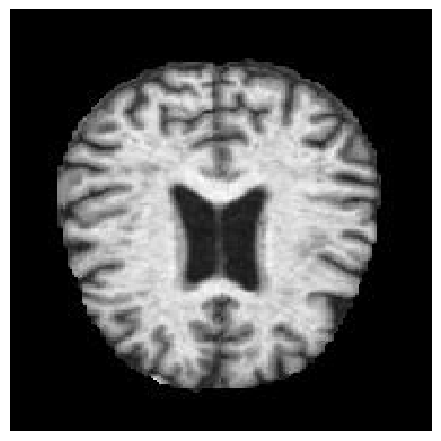

In [8]:
# Test Case 2: VeryMild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:\Users\LAPTOP HOUSE\Desktop\Alzheimers_Classification\test images\image2.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')

img = np.expand_dims(img,axis=0)
predict_x=model.predict(img) 
print(predict_x)
answer=np.argmax(predict_x,axis=1)
print(answer)

probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 31ms/step
[[2.3652354e-11 3.0416787e-14 9.9972671e-01 2.7324425e-04]]
[2]
1/1 [==============================] - 0s 32ms/step
99.97 % chances are there that the image is NonDemented


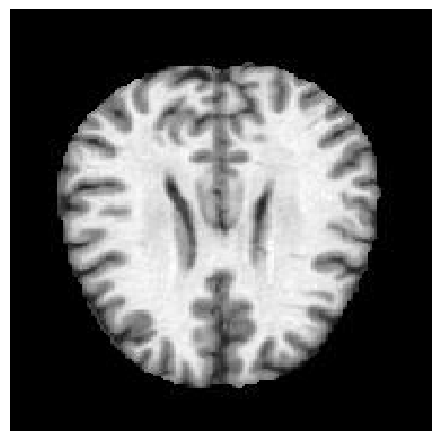

In [9]:
# Test Case 3: Non-Dementia

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:\Users\LAPTOP HOUSE\Desktop\Alzheimers_Classification\test images\image3.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')

img = np.expand_dims(img,axis=0)
predict_x=model.predict(img) 
print(predict_x)
answer=np.argmax(predict_x,axis=1)
print(answer)

probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 31ms/step
[[0.44633844 0.00195556 0.08236559 0.46934044]]
[3]
1/1 [==============================] - 0s 29ms/step
46.93 % chances are there that the image is VeryMildDemented


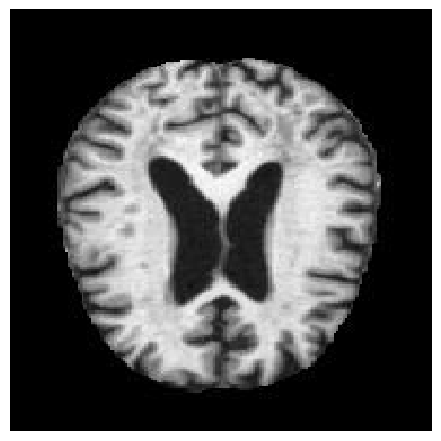

In [10]:
# Test Case 4: Mild-Dementia

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:\Users\LAPTOP HOUSE\Desktop\Alzheimers_Classification\test images\image4.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')

img = np.expand_dims(img,axis=0)
predict_x=model.predict(img) 
print(predict_x)
answer=np.argmax(predict_x,axis=1)
print(answer)

probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 16ms/step
[[6.2929383e-03 9.9313498e-01 1.1193004e-04 4.6009236e-04]]
[1]
1/1 [==============================] - 0s 32ms/step
99.31 % chances are there that the image is ModerateDemented


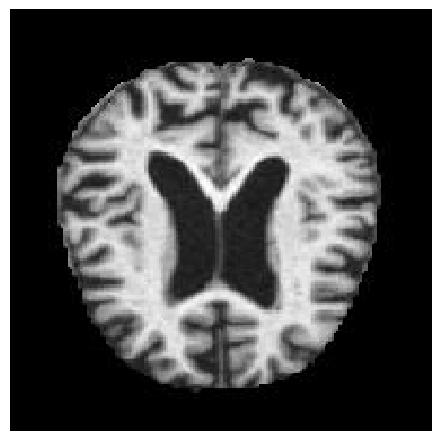

In [11]:
# Test Case 5: Moderate Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:\Users\LAPTOP HOUSE\Desktop\Alzheimers_Classification\test images\image5.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')

img = np.expand_dims(img,axis=0)
predict_x=model.predict(img) 
print(predict_x)
answer=np.argmax(predict_x,axis=1)
print(answer)

probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])